## Regression between the wind influence and AMV



I attach the wind influence on sea level for two new methods.
NearestPointAverage is the average of zonal winds at the 6 tide gauges.
PressureDifference is using the pressure in the southern box minus northern box of Dangendorf.
This way both methods have only one regressor for the wind. It makes them very simple and while it increases the deviance it reduces the standard error in the computation of the trend.


What you can do with these time series is the same as what you did in your thesis:
Fig. 13 a, b
Fig. 16 b, d
One difference is that instead of removing the linear trend from these time series you could remove the 3rd order trend. I use Polynomial from Numpy to do that (see the .html file of the notebook "Extend wind time series backward" section)
I find that this brings the pressure and wind results closer.


My suggestion for the maps of Fig 16 would be to use the SST product that is best correlated to the wind influence.
I hope we find more consistent results than Fig 16 d.
The doughnuts type of pattern you found in Fig 16 b, d for Dangendorf is interesting. Maybe you find something similar now as well.
If that is the case you could define a new "doughnut index" which is the average SST in that region. If that doughnut index average temperate lags behind the AMV temperature, which it probably does, then the problem of lag between AMV and wind influence on sea level is solved!

In [2]:
# import necessary packages

import numpy as np
import xarray as xr
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.tsatools

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Documents/Wind effect/Thesis-KNMI/AMV/code')

import regression as regr
import figures as fig

#### Import and process the wind data

In [3]:
wind_data = pd.read_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/WindInfluenceSeaLevelDutchCoast.csv', index_col = 'time')


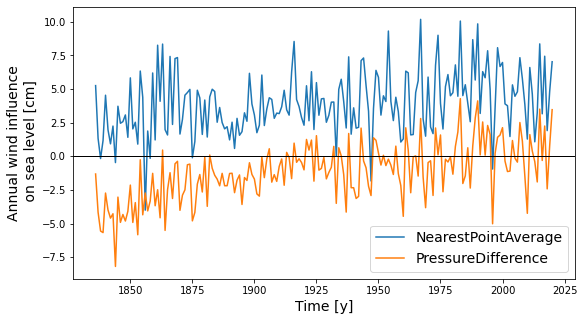

In [4]:
wind_data.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Annual wind influence\n on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.savefig(f'/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_raw', dpi = 500)

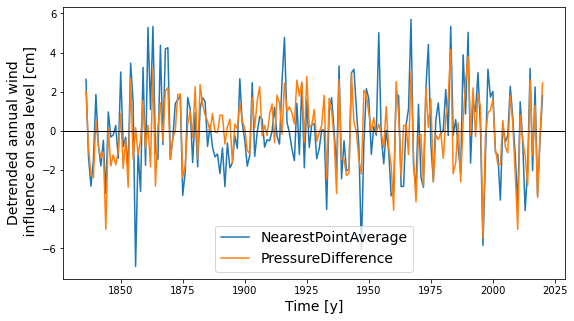

In [5]:
# Detrend the data using a first order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=1, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

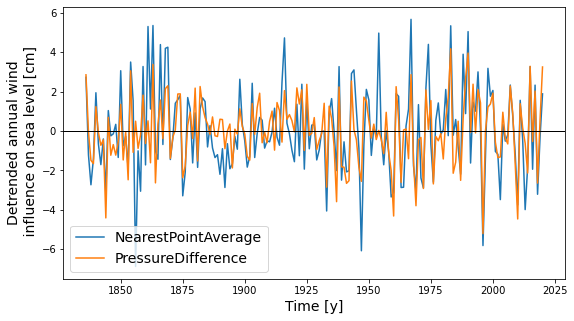

In [6]:
# Detrend the data using a second order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=2, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

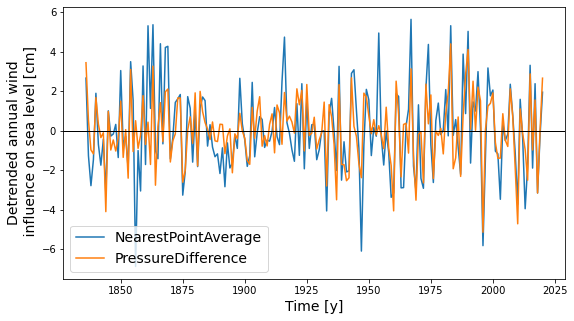

In [7]:
# Detrend the data using a third order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=3, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)
plt.savefig(f'/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_detrended', dpi = 500)

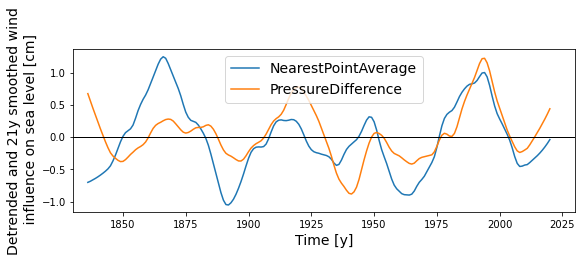

In [8]:
# Apply a LOWESS function with a 21-year smoothing window

def df_smooth(df, window):
    
    lowess = sm.nonparametric.lowess
    
    df_lo = df.copy()
    
    frac = window/(df.index.size)
    
    for column in df:
        df_lo[column] = lowess(df[column].values, df.index.values, frac, return_sorted=False)
        
        
    return df_lo


wind_data_dt_sm = df_smooth(wind_data_dt, 21)

wind_data_dt_sm.plot(figsize = (9,3))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 21y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_smoothed_detrended', bbox_inches='tight', dpi = 500)

In [9]:
wind_data_dt_sm.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_21')

#### Import and process the AMV data

The AMV data has been deseasonalized and detrended

In [15]:
path = '/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/'

# Deseasonalized and detrended
AMV_had = xr.open_dataset(path + 'AMO_ds_dt_raw_had.nc') 
AMV_ersst = xr.open_dataset(path + 'AMO_ds_dt_raw_ersst.nc') 
AMV_cobe = xr.open_dataset(path + 'AMO_ds_dt_raw_cobe.nc') 

# Change variable names
AMV_had = AMV_had.rename({'__xarray_dataarray_variable__': 'AMV'})
AMV_ersst = AMV_ersst.rename({'__xarray_dataarray_variable__': 'AMV'})
AMV_cobe = AMV_cobe.rename({'__xarray_dataarray_variable__': 'AMV'})

# Obtain annual averages 
AMV_had = AMV_had.groupby('time.year').mean('time')
AMV_ersst = AMV_ersst.groupby('time.year').mean('time')
AMV_cobe = AMV_cobe.groupby('time.year').mean('time')

# Create a dataframe 
AMV_data_dt = pd.DataFrame({'HadISSTv2': AMV_had.AMV, 'ERSSTv5':AMV_ersst.AMV, 'COBE-SST2': AMV_cobe.AMV}, index = AMV_cobe.year)
AMV_data_dt.index.name = 'time'

In [16]:
AMV_data_dt

,HadISSTv2,ERSSTv5,COBE-SST2
time,,,
1870,-0.064876,0.135647,-0.022205
1871,-0.090710,0.052964,-0.095801
1872,-0.120943,-0.068072,-0.156010
1873,-0.197644,-0.010218,-0.179611
1874,-0.190010,0.059488,-0.152831
...,...,...,...
2014,-0.133286,-0.131023,-0.137060
2015,-0.127954,-0.094863,-0.153978
2016,-0.002434,0.068500,0.020099


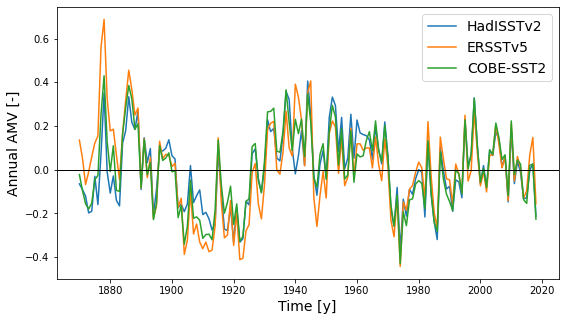

In [11]:
AMV_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

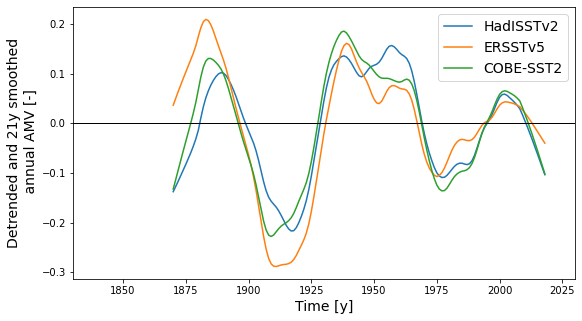

In [13]:
# Apply a LOWESS function with a 21-year smoothing window

AMV_data_dt_sm = df_smooth(AMV_data_dt, 21)

AMV_data_dt_sm.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 21y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_detrended_amv', bbox_inches='tight', dpi = 500)

In [14]:
AMV_data_dt_sm.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_21')

### Perform regression

In [110]:
results, timeseries = regr.lagged_regression(AMV_data_dt_sm, wind_data_dt_sm)

In [111]:
results

HadISSTv2                                          \
         NearestPointAverage                                           
                         -10       -9        -8        -7        -6    
result                                                                 
rmse                0.571089  0.571157  0.567898  0.561079  0.550459   
r$^2$               0.006970  0.000470  0.001749  0.011221  0.028898   
constant            0.016483  0.008533  0.000042 -0.009076 -0.018651   
coef                0.047846  0.012383 -0.023771 -0.059770 -0.094958   

                                                            ...  \
                                                            ...   
               -5        -4        -3        -2        -1   ...   
result                                                      ...   
rmse      0.536014  0.518175  0.497823  0.476299  0.455002  ...   
r$^2$     0.054321  0.086674  0.124845  0.167379  0.212273  ...   
constant -0.028665 -0.038972 -0.049282 -0.059160 -0.068196  ...   
coef     -0.128466 -0.159628 -0.188026 -0.213554 -0.236196  ...   

                  COBE-SST2                                                    \
         PressureDifference                                                     
                         16        17        18        19        20        21   
result                                                                          
rmse               0.427707  0.441209  0.452362  0.460911  0.466737  0.469894   
r$^2$              0.142998  0.094596  0.055342  0.026478  0.008313  0.000451   
constant           0.043768  0.042499  0.042003  0.042446  0.043900  0.046256   
coef              -0.168096 -0.136874 -0.104836 -0.072613 -0.040724 -0.009485   

                                                  
                                                  
                22        23        24        25  
result                                            
rmse      0.470562  0.468995  0.465402  0.460021  
r$^2$     0.002201  0.012812  0.031339  0.056347  
constant  0.049301  0.052761  0.056488  0.060450  
coef      0.020947  0.050468  0.078787  0.105393  

[4 rows x 216 columns]

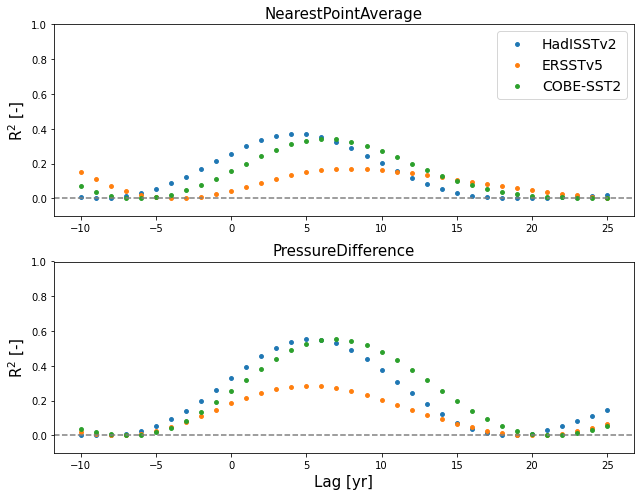

In [112]:
fig.plot_result_2(results, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0)

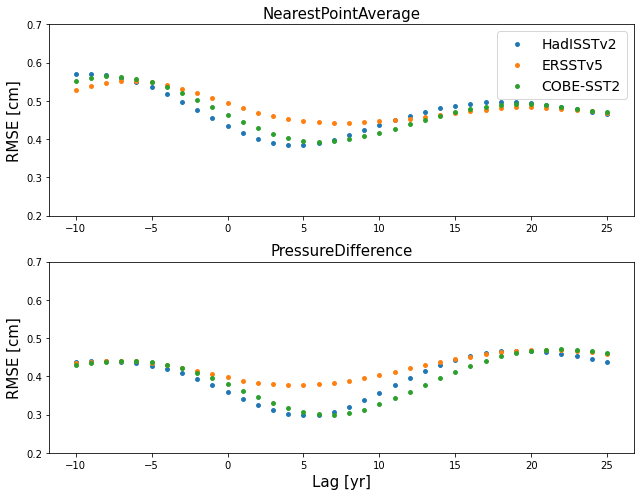

In [113]:
fig.plot_result_2(results, 'rmse', 'RMSE [cm]', ymin = 0.2, ymax = 0.7)

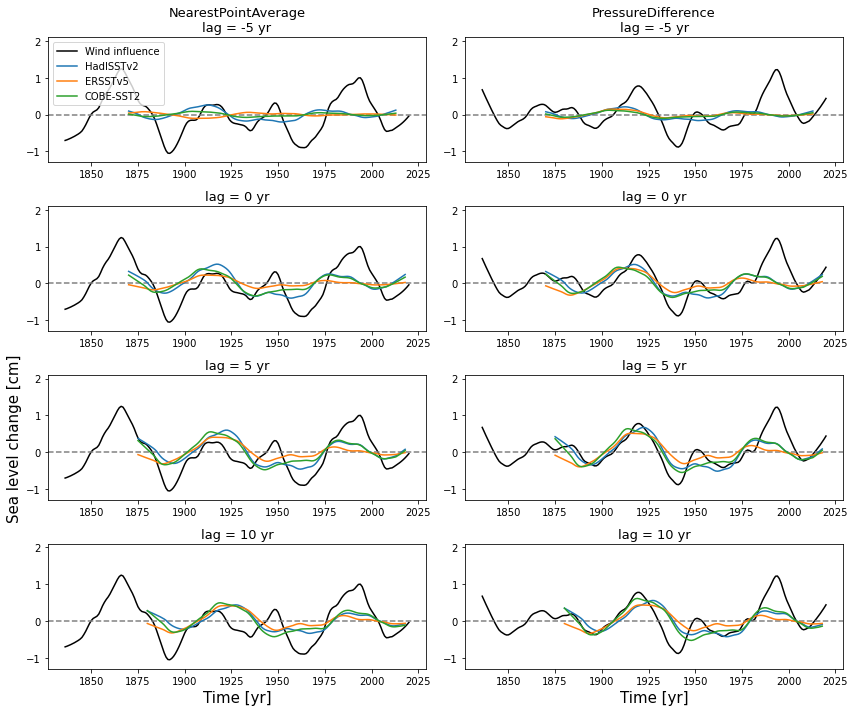

In [114]:
fig.plot_timeseries_2(timeseries, wind_data_dt_sm, [-5, 0, 5, 10], ymin= -1.3, ymax = 2.1)

Also do the regression for other windows, for example 31, 41, 51y 

### Perform regression with 31y smoothing function

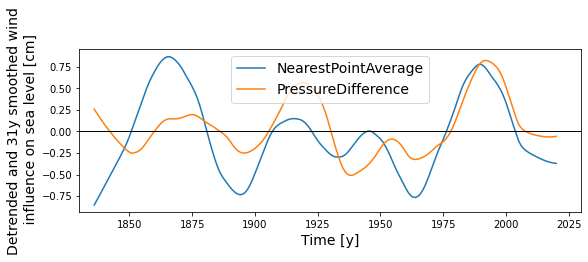

In [115]:
wind_data_dt_sm_31 = df_smooth(wind_data_dt, 31)

wind_data_dt_sm_31.plot(figsize = (9,3))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 31y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_31y_detrended_wind', bbox_inches='tight', dpi = 500)

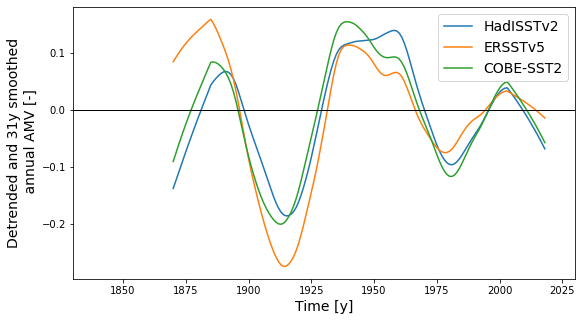

In [116]:
# Apply a LOWESS function with a 31-year smoothing window

AMV_data_dt_sm_31 = df_smooth(AMV_data_dt, 31)

AMV_data_dt_sm_31.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 31y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_31y_detrended_amv', bbox_inches='tight', dpi = 500)

In [117]:
AMV_data_dt_sm_31.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_31')

In [118]:
results_31, timeseries_31 = regr.lagged_regression(AMV_data_dt_sm_31, wind_data_dt_sm_31)

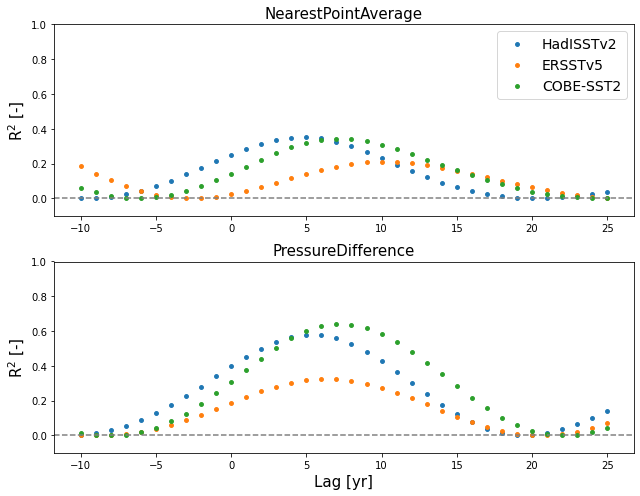

In [119]:
fig.plot_result_2(results_31, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 31)

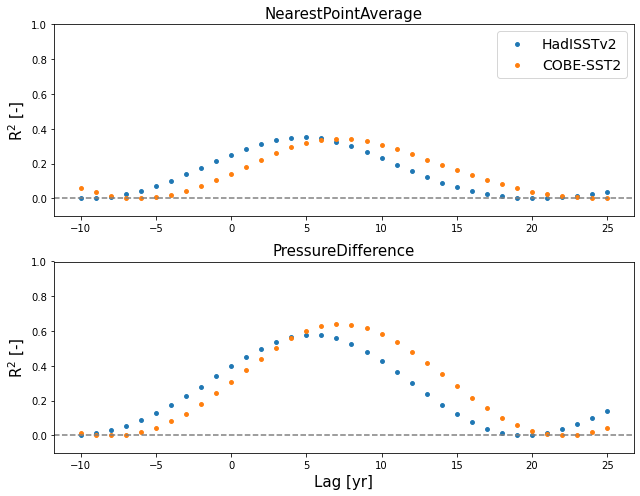

In [120]:
fig.plot_result_4(results_31, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 31)

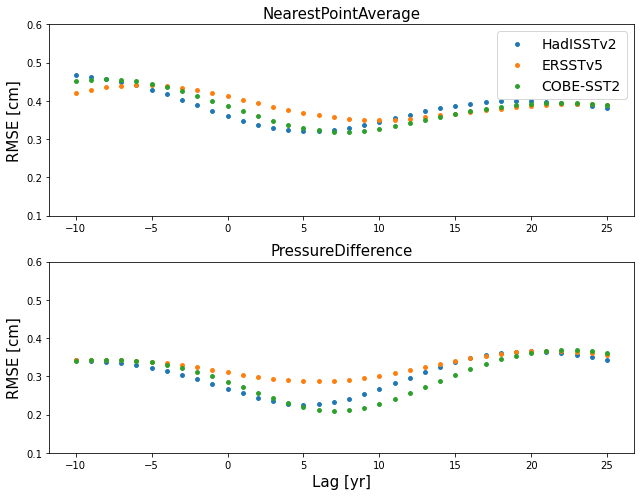

In [121]:
fig.plot_result_2(results_31, 'rmse', 'RMSE [cm]', ymin = 0.1, ymax = 0.6, window = 31)

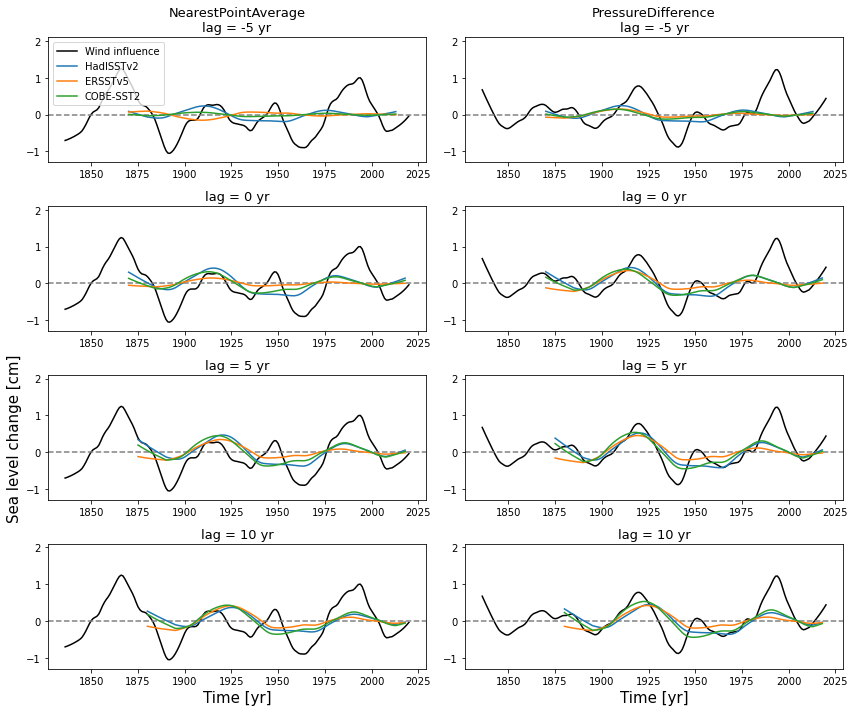

In [122]:
fig.plot_timeseries_2(timeseries_31, wind_data_dt_sm, [-5, 0, 5, 10], ymin= -1.3, ymax = 2.1, window = 31)

### Perform regression with 41y smoothing function

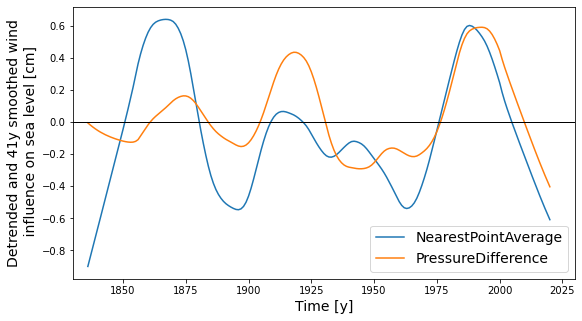

In [123]:
wind_data_dt_sm_41 = df_smooth(wind_data_dt, 41)

wind_data_dt_sm_41.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 41y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_41y_detrended_wind', bbox_inches='tight', dpi = 500)

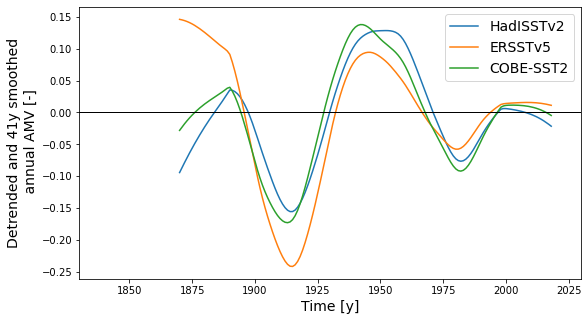

In [124]:
# Apply a LOWESS function with a 41-year smoothing window

AMV_data_dt_sm_41 = df_smooth(AMV_data_dt, 41)

AMV_data_dt_sm_41.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 41y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_41y_detrended_amv', bbox_inches='tight', dpi = 500)

In [125]:
wind_data_dt_sm_41.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_41')

In [126]:
results_41, timeseries_41 = regr.lagged_regression(AMV_data_dt_sm_41, wind_data_dt_sm_41)

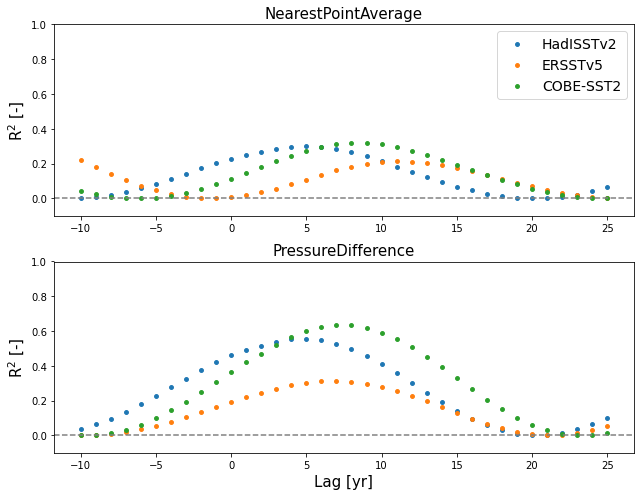

In [127]:
fig.plot_result_2(results_41, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 41)

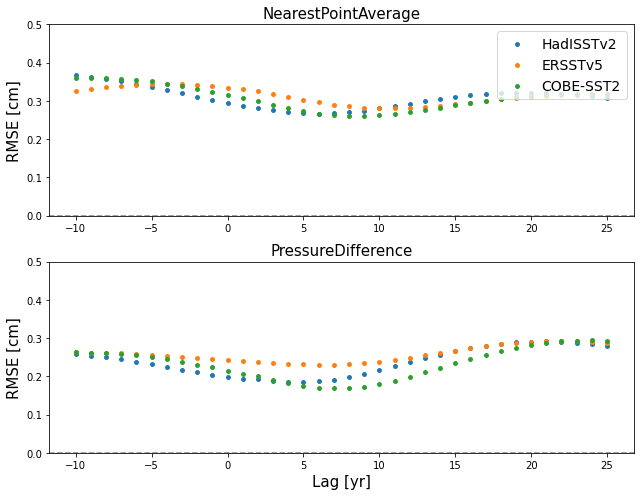

In [128]:
fig.plot_result_2(results_41, 'rmse', 'RMSE [cm]', ymin = 0.0, ymax = 0.5, window = 41)

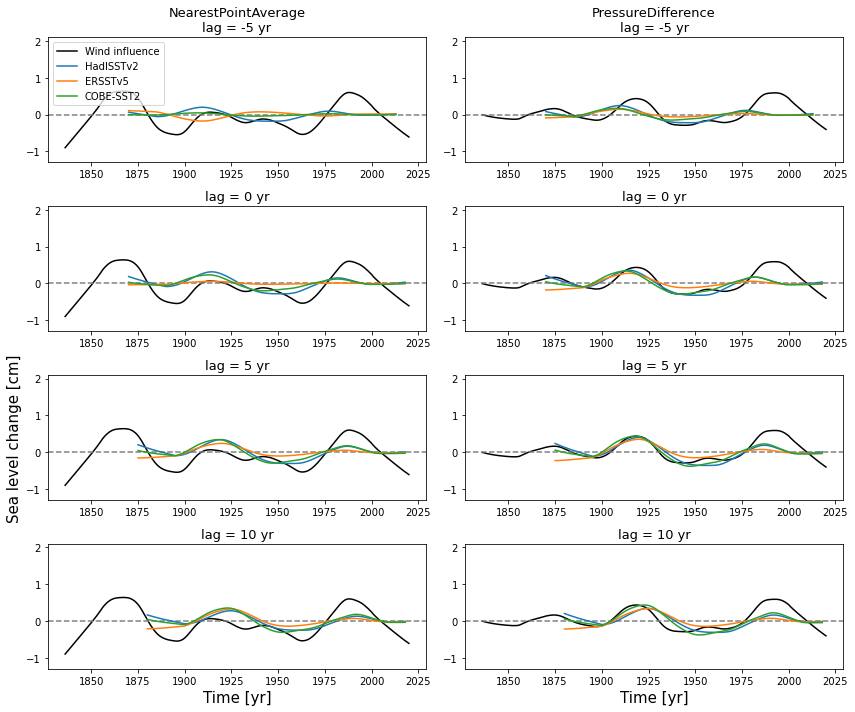

In [129]:
fig.plot_timeseries_2(timeseries_41, wind_data_dt_sm_41, [-5, 0, 5, 10], ymin= -1.3, ymax = 2.1, window = 41)

### Perform regression with 51y smoothing function

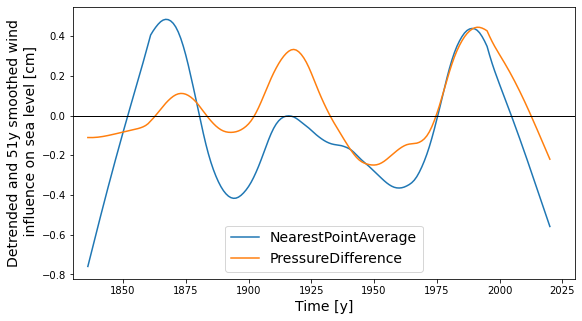

In [130]:
wind_data_dt_sm_51 = df_smooth(wind_data_dt, 51)

wind_data_dt_sm_51.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 51y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_51y_detrended_wind', bbox_inches='tight', dpi = 500)

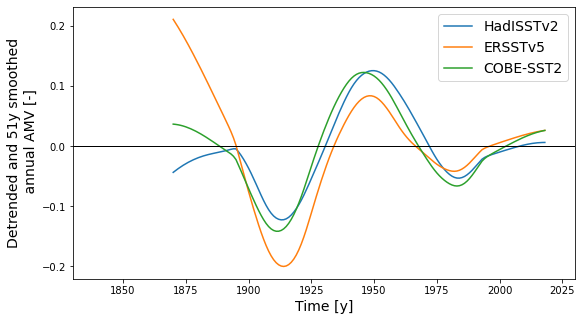

In [131]:
# Apply a LOWESS function with a 51-year smoothing window

AMV_data_dt_sm_51 = df_smooth(AMV_data_dt, 51)

AMV_data_dt_sm_51.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 51y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_51y_detrended_amv', bbox_inches='tight', dpi = 500)

In [132]:
AMV_data_dt_sm_51.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_51')

In [133]:
results_51, timeseries_51 = regr.lagged_regression(AMV_data_dt_sm_51, wind_data_dt_sm_51)

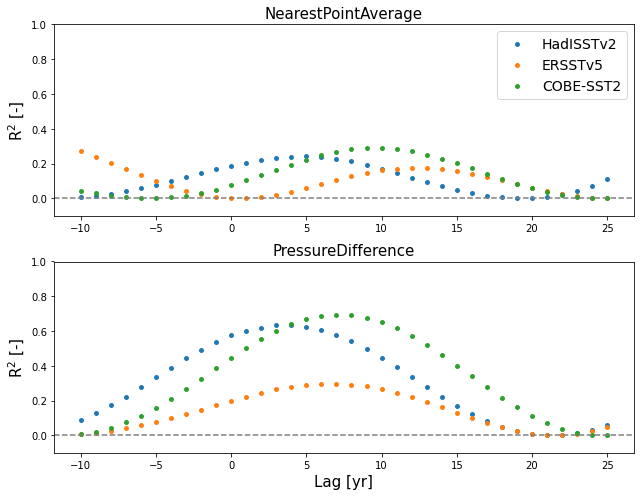

In [134]:
fig.plot_result_2(results_51, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 51)

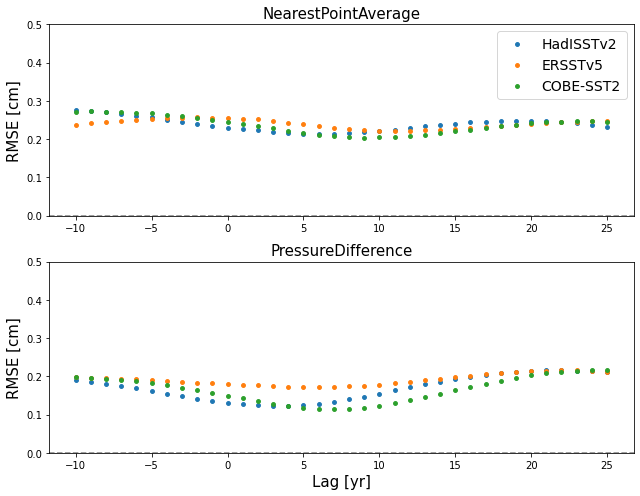

In [135]:
fig.plot_result_2(results_51, 'rmse', 'RMSE [cm]', ymin = 0.0, ymax = 0.5, window = 51)

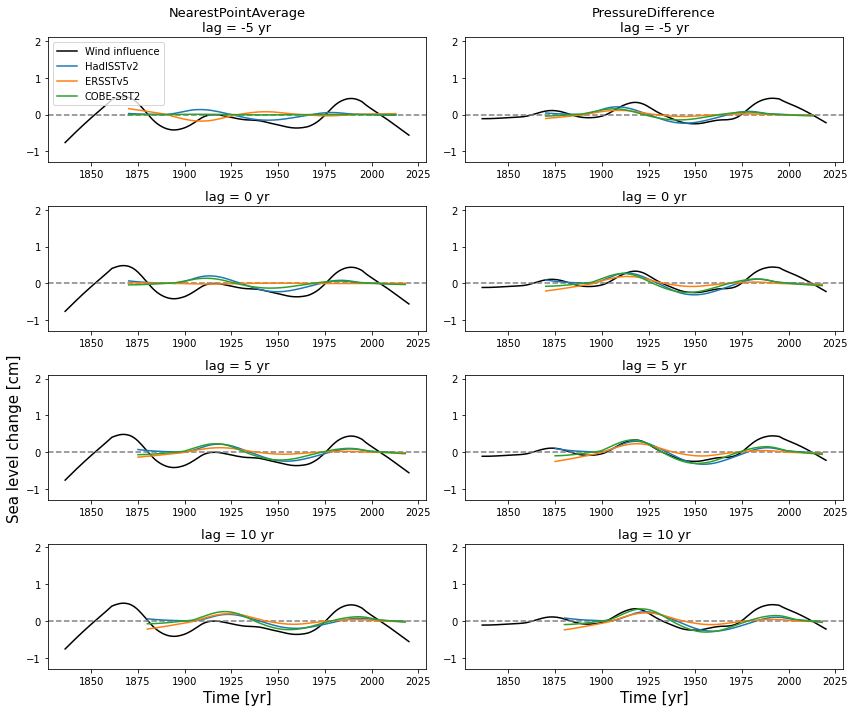

In [136]:
fig.plot_timeseries_2(timeseries_51, wind_data_dt_sm_51, [-5, 0, 5, 10], ymin= -1.3, ymax = 2.1, window = 51)

### Perform regression using differently processed AMV data

In [148]:
path = '/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/'

# Raw
AMV_had_rw = xr.open_dataset(path + 'AMO_raw_had.nc') 
AMV_cobe_rw = xr.open_dataset(path + 'AMO_raw_cobe.nc') 


# Change variable names
AMV_had_rw = AMV_had_rw.rename({'__xarray_dataarray_variable__': 'AMV'})
AMV_cobe_rw = AMV_cobe_rw.rename({'__xarray_dataarray_variable__': 'AMV'})


# Detrend and smooth the SST over this region
AMV_raw_had_rw_dt = statsmodels.tsa.tsatools.detrend(AMV_had_rw.AMV, order=3, axis = 0)
AMV_raw_cobe_rw_dt = statsmodels.tsa.tsatools.detrend(AMV_cobe_rw.AMV, order=3, axis = 0)


# Change time values
AMV_raw_had_rw_dt.coords['time'] = np.arange(1870, 2019)
AMV_raw_cobe_rw_dt.coords['time'] = np.arange(1870, 2019)


# Create a dataframe 
AMV_data_rw_dt = pd.DataFrame({'HadISSTv2': AMV_raw_had_rw_dt, 'COBE-SST2': AMV_raw_cobe_rw_dt}, index = AMV_raw_cobe_rw_dt.time)
AMV_data_rw_dt.index.name = 'time'

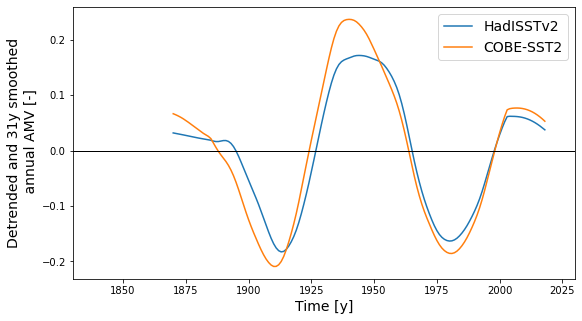

In [149]:
# Apply a LOWESS function with a 31-year smoothing window

AMV_data_rw_dt_sm_31 = df_smooth(AMV_data_rw_dt, 31)

AMV_data_rw_dt_sm_31.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 31y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_31y_detrended_amv', bbox_inches='tight', dpi = 500)

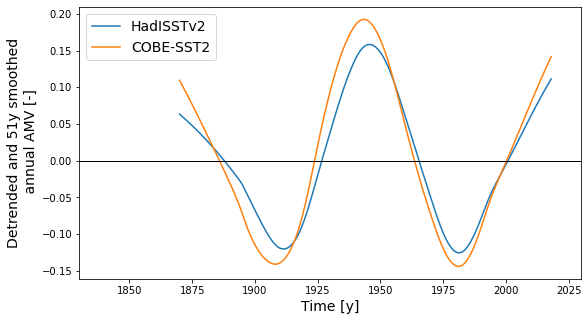

In [150]:
# Apply a LOWESS function with a 51-year smoothing window

AMV_data_rw_dt_sm_51 = df_smooth(AMV_data_rw_dt, 51)

AMV_data_rw_dt_sm_51.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 51y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_51y_detrended_amv', bbox_inches='tight', dpi = 500)

In [151]:
results_rw_31, timeseries_rw_31 = regr.lagged_regression(AMV_data_rw_dt_sm_31, wind_data_dt_sm_31)

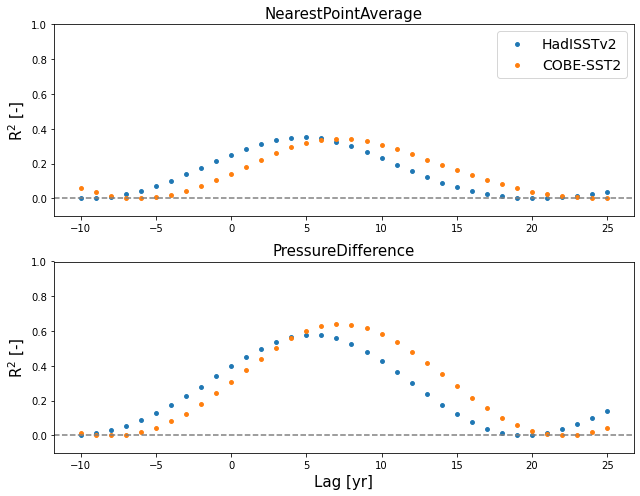

In [152]:
fig.plot_result_3(results_31, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 31)

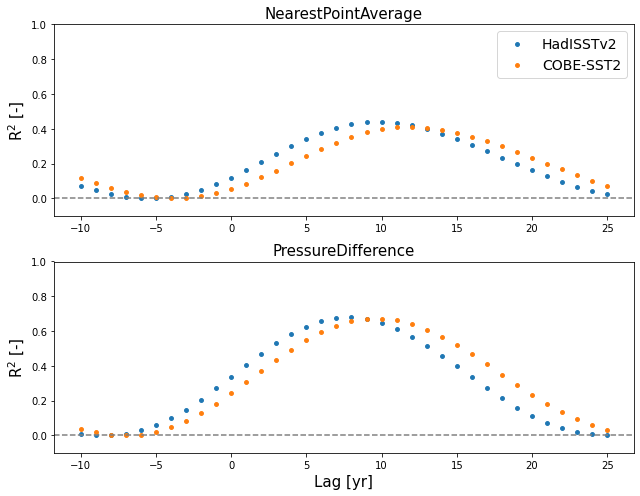

In [153]:
fig.plot_result_3(results_rw_31, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 31)

In [142]:
results_rw_51, timeseries_rw_51 = regr.lagged_regression(AMV_data_rw_dt_sm_51, wind_data_dt_sm_51)

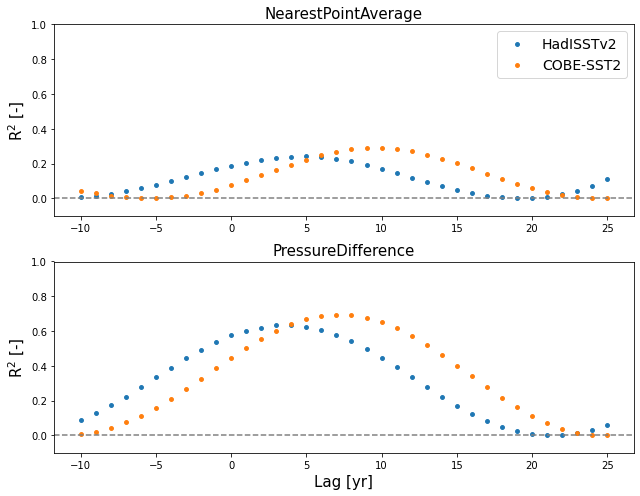

In [143]:
fig.plot_result_3(results_rw_51, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 51)

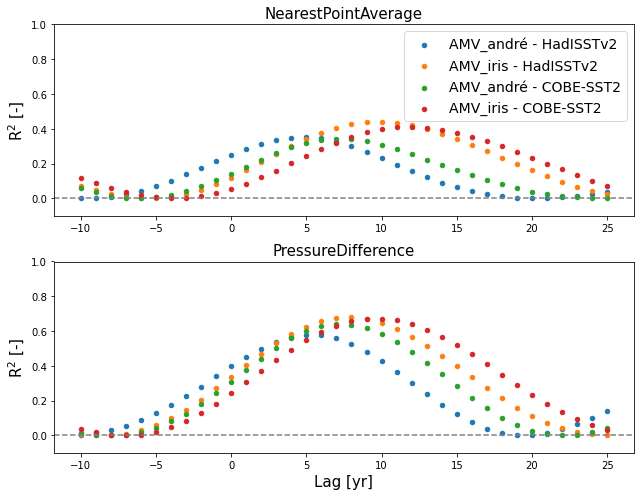

In [154]:
fig.plot_result_5(results_31, results_rw_31, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 31)